In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
num_influencers = 1
num_agents = 12

In [4]:
test_imperfect = True

In [5]:
no_basin_perfect_info_stats, no_basin_imperfect_info_stats = test(
    topics=topics,
    varied_param='init_topic_produced_method',
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 0.75, 2),
    consumer_attention_bound=30,
    consumer_external_interest_prob=3,
    delay_sensitivity=None,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=60,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    init_topic_produced_method=['main'],
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=test_imperfect,
    basinhop=False,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 12
Optimizing producer 0
Optimization succeeded (overall 0.008315959013998508s): nit=5, nfev=14, njev=7.
Optimizing producer 1
Optimization succeeded (overall 0.00626462500076741s): nit=5, nfev=14, njev=7.
Optimizing producer 2
Optimization succeeded (overall 0.004704874940216541s): nit=4, nfev=12, njev=6.
Optimizing producer 3
Optimization succeeded (overall 0.004784416989423335s): nit=4, nfev=12, njev=6.
Optimizing producer 4
Optimization succeeded (overall 0.003987832926213741s): nit=3, nfev=10, njev=5.
Optimizing producer 5
Optimization succeeded (overall 0.003850625013001263s): nit=3, nfev=10, njev=5.
Optimizing producer 6
Optimization succeeded (overall 0.003792500006966293s): nit=3, nfev=10, njev

In [6]:
basin_perfect_info_stats, basin_imperfect_info_stats = test(
    topics=topics,
    varied_param='init_topic_produced_method',
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 0.75, 2),
    consumer_attention_bound=30,
    consumer_external_interest_prob=3,
    delay_sensitivity=None,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=60,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    init_topic_produced_method=['main'],
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=test_imperfect,
    basinhop=True,
)
basin_perfect_info_stat = basin_perfect_info_stats[0]
no_basin_perfect_info_stat = no_basin_perfect_info_stats[0]
if test_imperfect:
    basin_imperfect_info_stat = basin_imperfect_info_stats[0]
    no_basin_imperfect_info_stat = no_basin_imperfect_info_stats[0]

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 12
Optimizing producer 0
Optimization succeeded (overall 0.9229973749024794s): nit=100, nfev=1338, njev=669.
Optimizing producer 1
Optimization succeeded (overall 0.7148633749457076s): nit=100, nfev=1302, njev=651.
Optimizing producer 2
Optimization succeeded (overall 0.7183146660681814s): nit=100, nfev=1272, njev=636.
Optimizing producer 3
Optimization succeeded (overall 0.6830487919505686s): nit=100, nfev=1274, njev=637.
Optimizing producer 4
Optimization succeeded (overall 0.6648022090084851s): nit=100, nfev=1230, njev=615.
Optimizing producer 5
Optimization succeeded (overall 0.6321362080052495s): nit=100, nfev=1168, njev=584.
Optimizing producer 6
Optimization succeeded (overall 0.6243065410526469s

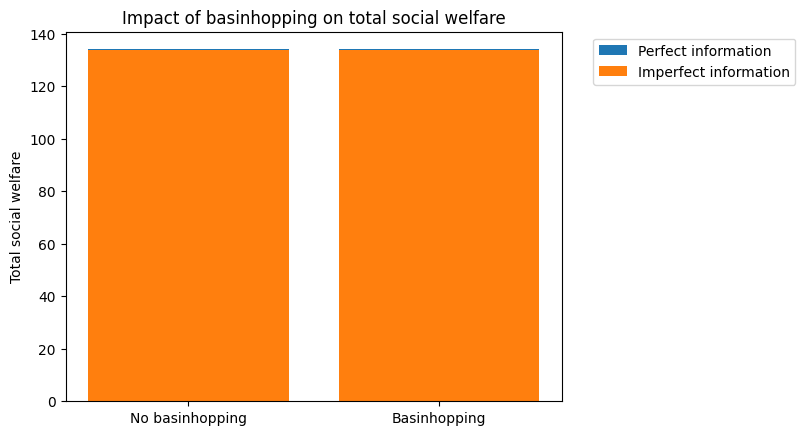

In [7]:
plt.figure()
plt.title('Impact of basinhopping on total social welfare')
plt.bar([0, 1], [no_basin_perfect_info_stat.total_social_welfare[-1], basin_perfect_info_stat.total_social_welfare[-1]], label='Perfect information')
if test_imperfect:
    plt.bar([0, 1], [no_basin_imperfect_info_stat.total_social_welfare[-1], basin_imperfect_info_stat.total_social_welfare[-1]], label='Imperfect information')
plt.xticks([0, 1], ['No basinhopping', 'Basinhopping'])
plt.ylabel('Total social welfare')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

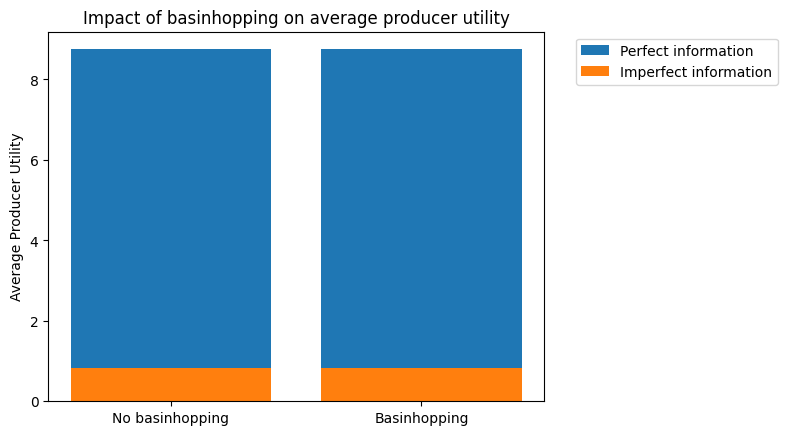

In [8]:
plt.figure()
plt.title('Impact of basinhopping on average producer utility')
plt.bar([0, 1], [no_basin_perfect_info_stat.average_producer_utility[-1], basin_perfect_info_stat.average_producer_utility[-1]], label='Perfect information')
if test_imperfect:
    plt.bar([0, 1], [no_basin_imperfect_info_stat.average_producer_utility[-1], basin_imperfect_info_stat.average_producer_utility[-1]], label='Imperfect information')
plt.xticks([0, 1], ['No basinhopping', 'Basinhopping'])
plt.ylabel('Average Producer Utility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

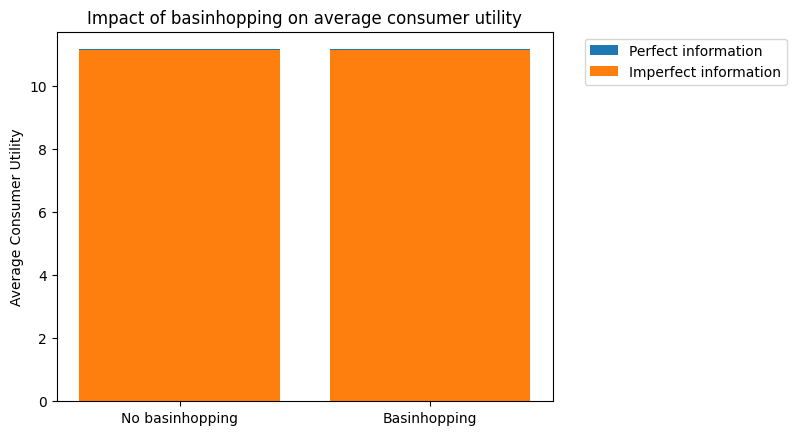

In [9]:
plt.figure()
plt.title('Impact of basinhopping on average consumer utility')
plt.bar([0, 1], [no_basin_perfect_info_stat.average_consumer_utility[-1], basin_perfect_info_stat.average_consumer_utility[-1]], label='Perfect information')
if test_imperfect:
    plt.bar([0, 1], [no_basin_imperfect_info_stat.average_consumer_utility[-1], basin_imperfect_info_stat.average_consumer_utility[-1]], label='Imperfect information')
plt.xticks([0, 1], ['No basinhopping', 'Basinhopping'])
plt.ylabel('Average Consumer Utility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

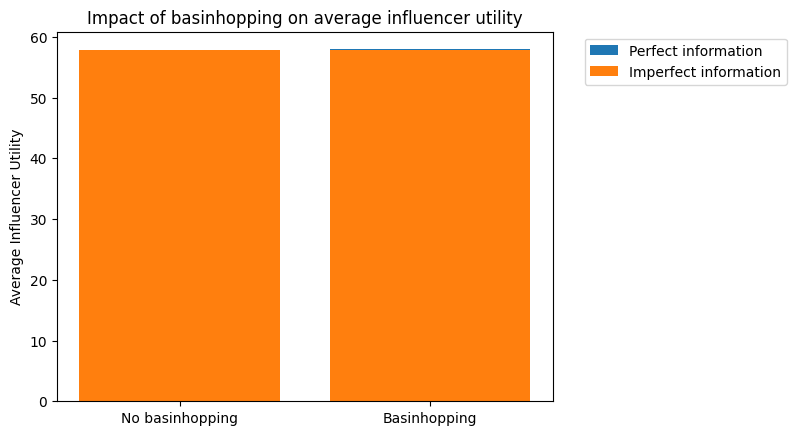

In [10]:
plt.figure()
plt.title('Impact of basinhopping on average influencer utility')
plt.bar([0, 1], [no_basin_perfect_info_stat.average_influencer_utility[-1], basin_perfect_info_stat.average_influencer_utility[-1]], label='Perfect information')
if test_imperfect:
    plt.bar([0, 1], [no_basin_imperfect_info_stat.average_influencer_utility[-1], basin_imperfect_info_stat.average_influencer_utility[-1]], label='Imperfect information')
plt.xticks([0, 1], ['No basinhopping', 'Basinhopping'])
plt.ylabel('Average Influencer Utility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

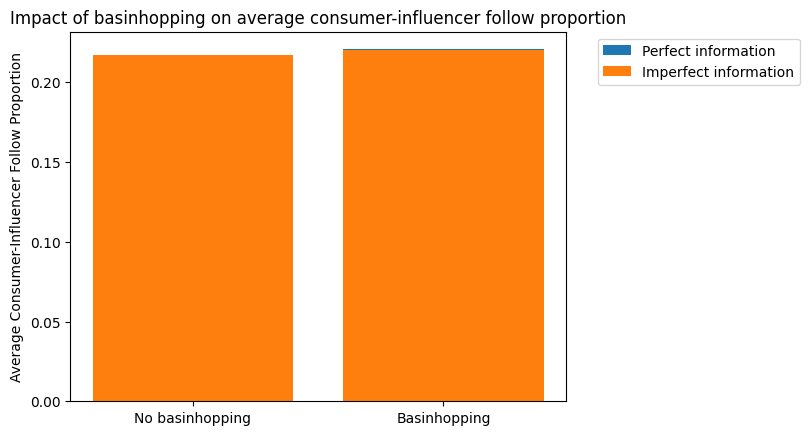

In [11]:
plt.figure()
plt.title('Impact of basinhopping on average consumer-influencer follow proportion')
plt.bar([0, 1], [no_basin_perfect_info_stat.average_influencer_follow_proportion[-1], basin_perfect_info_stat.average_influencer_follow_proportion[-1]], label='Perfect information')
if test_imperfect:
    plt.bar([0, 1], [no_basin_imperfect_info_stat.average_influencer_follow_proportion[-1], basin_imperfect_info_stat.average_influencer_follow_proportion[-1]], label='Imperfect information')
plt.xticks([0, 1], ['No basinhopping', 'Basinhopping'])
plt.ylabel('Average Consumer-Influencer Follow Proportion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

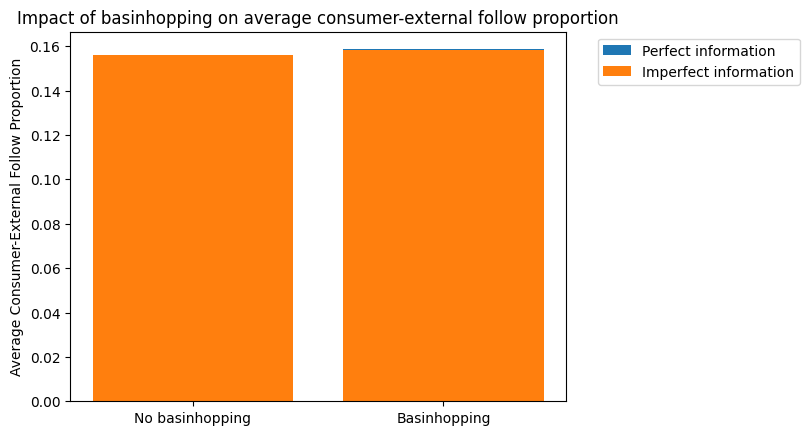

In [12]:
plt.figure()
plt.title('Impact of basinhopping on average consumer-external follow proportion')
plt.bar([0, 1], [no_basin_perfect_info_stat.average_external_follow_proportion[-1], basin_perfect_info_stat.average_external_follow_proportion[-1]], label='Perfect information')
if test_imperfect:
    plt.bar([0, 1], [no_basin_imperfect_info_stat.average_external_follow_proportion[-1], basin_imperfect_info_stat.average_external_follow_proportion[-1]], label='Imperfect information')
plt.xticks([0, 1], ['No basinhopping', 'Basinhopping'])
plt.ylabel('Average Consumer-External Follow Proportion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

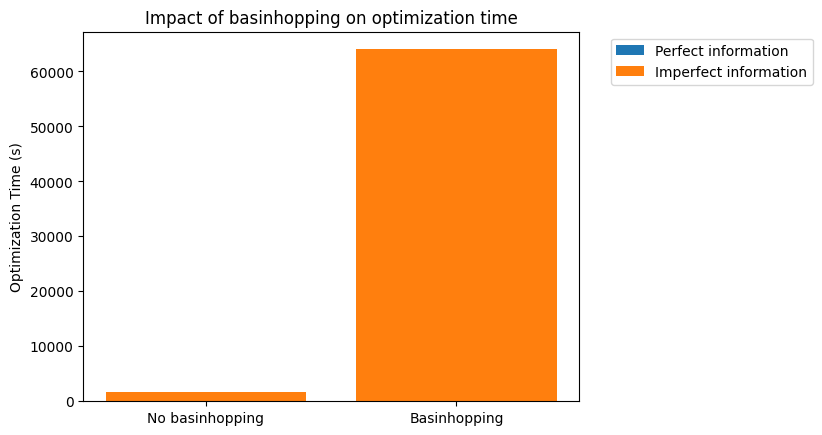

In [13]:
plt.figure()
plt.title('Impact of basinhopping on optimization time')
plt.bar([0, 1], [no_basin_perfect_info_stat.optimization_time, basin_perfect_info_stat.optimization_time], label='Perfect information')
if test_imperfect:
    plt.bar([0, 1], [no_basin_imperfect_info_stat.optimization_time, basin_imperfect_info_stat.optimization_time], label='Imperfect information')
plt.xticks([0, 1], ['No basinhopping', 'Basinhopping'])
plt.ylabel('Optimization Time (s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

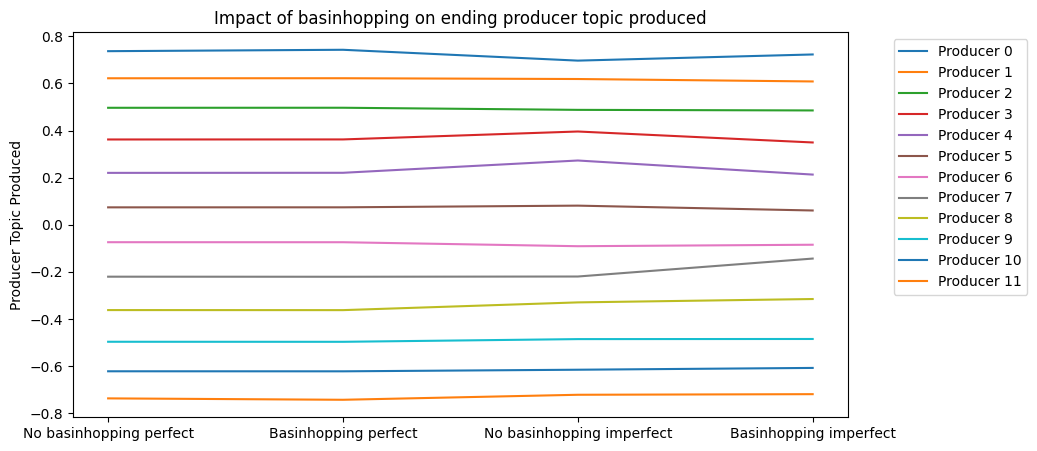

In [14]:
plt.figure(figsize=(10, 5))
plt.title('Impact of basinhopping on ending producer topic produced')
indices = no_basin_perfect_info_stat.producer_stats.keys()
bounds = [0, 1]
titles = ['No basinhopping', 'Basinhopping']
if test_imperfect:
    bounds = [0, 1, 2, 3]
    titles = ['No basinhopping perfect', 'Basinhopping perfect', 'No basinhopping imperfect', 'Basinhopping imperfect']
for index in no_basin_perfect_info_stat.producer_stats.keys():
    topics = []
    no_basin_perfect_topic = no_basin_perfect_info_stat.producer_stats[index].topics[-1]
    topics.append(no_basin_perfect_topic)
    basin_perfect_topic = basin_perfect_info_stat.producer_stats[index].topics[-1]
    topics.append(basin_perfect_topic)
    if test_imperfect:
        no_basin_imperfect_topic = no_basin_imperfect_info_stat.producer_stats[index].topics[-1]
        topics.append(no_basin_imperfect_topic)
        basin_imperfect_topic = basin_imperfect_info_stat.producer_stats[index].topics[-1]
        topics.append(basin_imperfect_topic)
    plt.plot(bounds, topics, label='Producer {}'.format(index))
plt.xticks(bounds, titles)
plt.ylabel('Producer Topic Produced')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

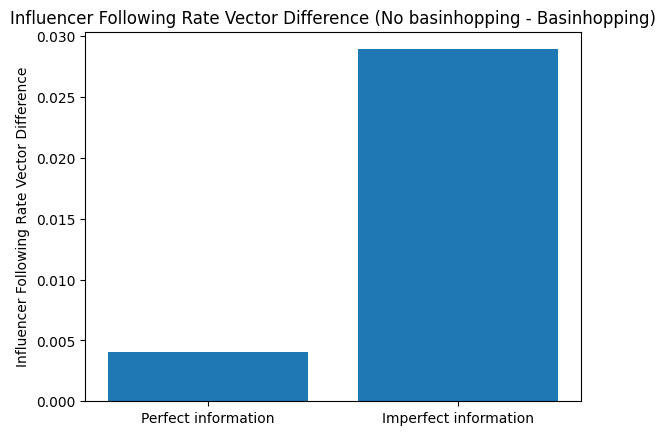

In [15]:
plt.figure()
plt.title('Influencer Following Rate Vector Difference (No basinhopping - Basinhopping)')

no_basin_perfect_vec = list(no_basin_perfect_info_stat.influencer_stats.values())[0].following_rates[-1]
basin_perfect_vec = list(basin_perfect_info_stat.influencer_stats.values())[0].following_rates[-1]
perfect_diff = np.linalg.norm(basin_perfect_vec - no_basin_perfect_vec)
vals = [perfect_diff]
bars = [0]
labels = ['Perfect information']


if test_imperfect:
    no_basin_imperfect_vec = list(no_basin_imperfect_info_stat.influencer_stats.values())[0].following_rates[-1]
    basin_imperfect_vec = list(basin_imperfect_info_stat.influencer_stats.values())[0].following_rates[-1]
    imperfect_diff = np.linalg.norm(basin_imperfect_vec - no_basin_imperfect_vec)
    vals.append(imperfect_diff)
    bars.append(1)
    labels.append('Imperfect information')

plt.bar(bars, vals)
plt.xticks(bars, labels)

plt.ylabel('Influencer Following Rate Vector Difference')
plt.show()


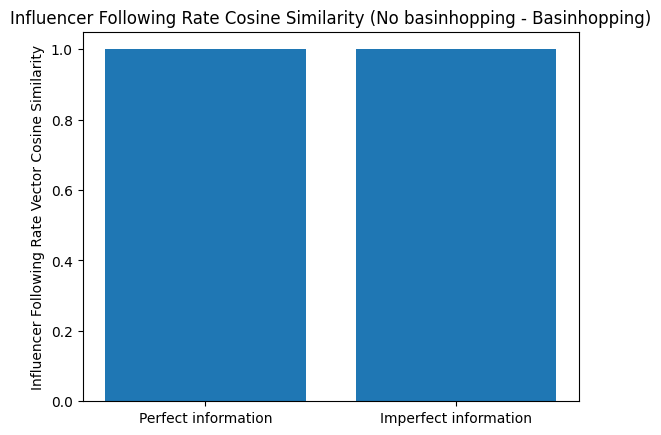

In [16]:
plt.figure()
plt.title('Influencer Following Rate Cosine Similarity (No basinhopping - Basinhopping)')

no_basin_perfect_vec = list(no_basin_perfect_info_stat.influencer_stats.values())[0].following_rates[-1]
basin_perfect_vec = list(basin_perfect_info_stat.influencer_stats.values())[0].following_rates[-1]
perfect_sim = np.dot(basin_perfect_vec, no_basin_perfect_vec) / (np.linalg.norm(basin_perfect_vec) * np.linalg.norm(no_basin_perfect_vec))
vals = [perfect_sim]
bars = [0]
labels = ['Perfect information']


if test_imperfect:
    no_basin_imperfect_vec = list(no_basin_imperfect_info_stat.influencer_stats.values())[0].following_rates[-1]
    basin_imperfect_vec = list(basin_imperfect_info_stat.influencer_stats.values())[0].following_rates[-1]
    imperfect_sim = np.dot(basin_imperfect_vec, no_basin_imperfect_vec) / (np.linalg.norm(basin_imperfect_vec) * np.linalg.norm(no_basin_imperfect_vec))
    vals.append(imperfect_sim)
    bars.append(1)
    labels.append('Imperfect information')

plt.bar(bars, vals)
plt.xticks(bars, labels)

plt.ylabel('Influencer Following Rate Vector Cosine Similarity')
plt.show()


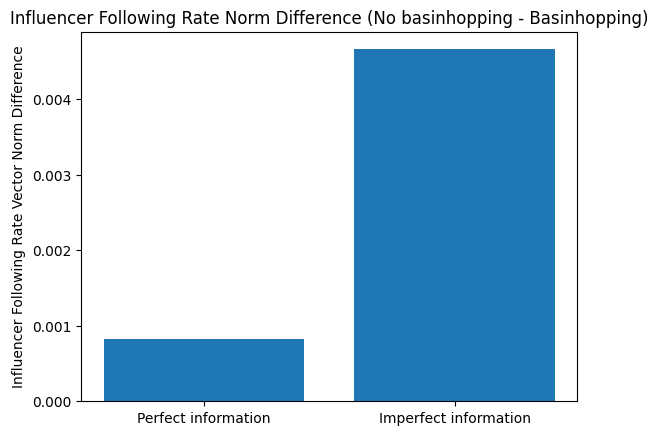

In [17]:
plt.figure()
plt.title('Influencer Following Rate Norm Difference (No basinhopping - Basinhopping)')

no_basin_perfect_vec = list(no_basin_perfect_info_stat.influencer_stats.values())[0].following_rates[-1]
basin_perfect_vec = list(basin_perfect_info_stat.influencer_stats.values())[0].following_rates[-1]
perfect_norm_diff = (np.linalg.norm(basin_perfect_vec) - np.linalg.norm(no_basin_perfect_vec)) / np.linalg.norm(no_basin_perfect_vec) * 100
vals = [perfect_norm_diff]
bars = [0]
labels = ['Perfect information']


if test_imperfect:
    no_basin_imperfect_vec = list(no_basin_imperfect_info_stat.influencer_stats.values())[0].following_rates[-1]
    basin_imperfect_vec = list(basin_imperfect_info_stat.influencer_stats.values())[0].following_rates[-1]
    imperfect_norm_diff = (np.linalg.norm(basin_imperfect_vec) - np.linalg.norm(no_basin_imperfect_vec)) / np.linalg.norm(no_basin_imperfect_vec) * 100
    vals.append(imperfect_norm_diff)
    bars.append(1)
    labels.append('Imperfect information')

plt.bar(bars, vals)
plt.xticks(bars, labels)

plt.ylabel('Influencer Following Rate Vector Norm Difference')
plt.show()


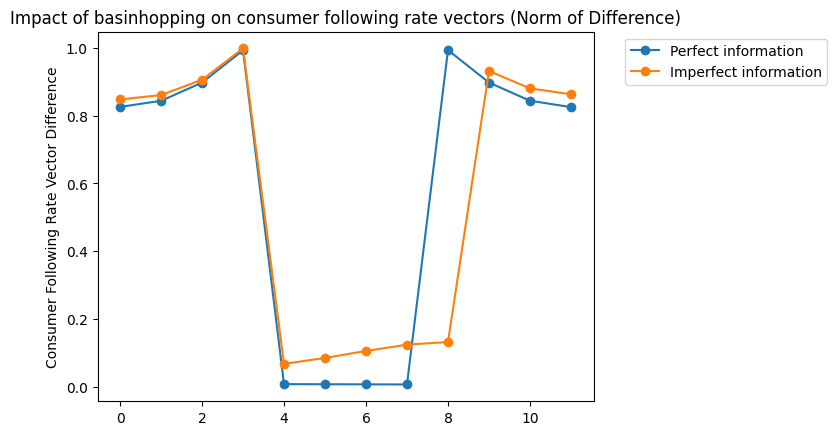

In [18]:
plt.figure()
plt.title('Impact of basinhopping on consumer following rate vectors (Norm of Difference)')
indices = no_basin_perfect_info_stat.consumer_stats.keys()
perfect_diffs = []
imperfect_diffs = []
for index in indices:
    no_basin_perfect_vec = no_basin_perfect_info_stat.consumer_stats[index].following_rates[-1]
    basin_perfect_vec = basin_perfect_info_stat.consumer_stats[index].following_rates[-1]
    perfect_diffs.append(np.linalg.norm(basin_perfect_vec - no_basin_perfect_vec))
    if test_imperfect:
        no_basin_imperfect_vec = no_basin_imperfect_info_stat.consumer_stats[index].following_rates[-1]
        basin_imperfect_vec = basin_imperfect_info_stat.consumer_stats[index].following_rates[-1]
        imperfect_diffs.append(np.linalg.norm(basin_imperfect_vec - no_basin_imperfect_vec))
plt.plot(indices, perfect_diffs, label='Perfect information', marker='o')
if test_imperfect:
    plt.plot(indices, imperfect_diffs, label='Imperfect information', marker='o')
plt.ylabel('Consumer Following Rate Vector Difference')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

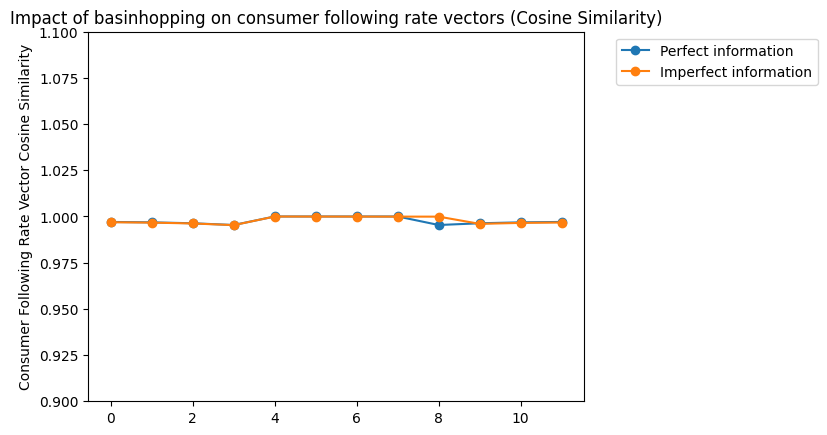

In [19]:
plt.figure()
plt.title('Impact of basinhopping on consumer following rate vectors (Cosine Similarity)')
indices = no_basin_perfect_info_stat.consumer_stats.keys()
perfect_sims = []
imperfect_sims = []
for index in indices:
    no_basin_perfect_vec = no_basin_perfect_info_stat.consumer_stats[index].following_rates[-1]
    basin_perfect_vec = basin_perfect_info_stat.consumer_stats[index].following_rates[-1]
    perfect_sims.append(np.dot(basin_perfect_vec, no_basin_perfect_vec) / (np.linalg.norm(basin_perfect_vec) * np.linalg.norm(no_basin_perfect_vec)))
    if test_imperfect:
        no_basin_imperfect_vec = no_basin_imperfect_info_stat.consumer_stats[index].following_rates[-1]
        basin_imperfect_vec = basin_imperfect_info_stat.consumer_stats[index].following_rates[-1]
        imperfect_sims.append(np.dot(basin_imperfect_vec, no_basin_imperfect_vec) / (np.linalg.norm(basin_imperfect_vec) * np.linalg.norm(no_basin_imperfect_vec)))
plt.plot(indices, perfect_sims, label='Perfect information', marker='o')
if test_imperfect:
    plt.plot(indices, imperfect_sims, label='Imperfect information', marker='o')
plt.ylabel('Consumer Following Rate Vector Cosine Similarity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.9, 1.1)
plt.show()

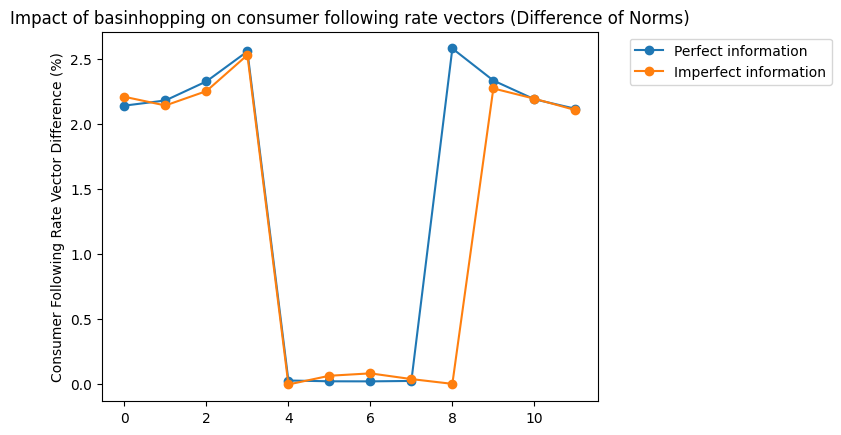

In [20]:
plt.figure()
plt.title('Impact of basinhopping on consumer following rate vectors (Difference of Norms)')
indices = no_basin_perfect_info_stat.consumer_stats.keys()
perfect_diffs = []
imperfect_diffs = []
for index in indices:
    no_basin_perfect_vec = no_basin_perfect_info_stat.consumer_stats[index].following_rates[-1]
    basin_perfect_vec = basin_perfect_info_stat.consumer_stats[index].following_rates[-1]
    perfect_diffs.append((np.linalg.norm(basin_perfect_vec) - np.linalg.norm(no_basin_perfect_vec)) / np.linalg.norm(no_basin_perfect_vec) * 100)
    if test_imperfect:
        no_basin_imperfect_vec = no_basin_imperfect_info_stat.consumer_stats[index].following_rates[-1]
        basin_imperfect_vec = basin_imperfect_info_stat.consumer_stats[index].following_rates[-1]
        imperfect_diffs.append((np.linalg.norm(basin_imperfect_vec) - np.linalg.norm(no_basin_imperfect_vec)) / np.linalg.norm(no_basin_imperfect_vec) * 100)
plt.plot(indices, perfect_diffs, label='Perfect information', marker='o')
if test_imperfect:
    plt.plot(indices, imperfect_diffs, label='Imperfect information', marker='o')
plt.ylabel('Consumer Following Rate Vector Difference (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()